## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Here we will observe the distribution of our classes



In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [6]:
### Let's check how many samples we have for each class
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


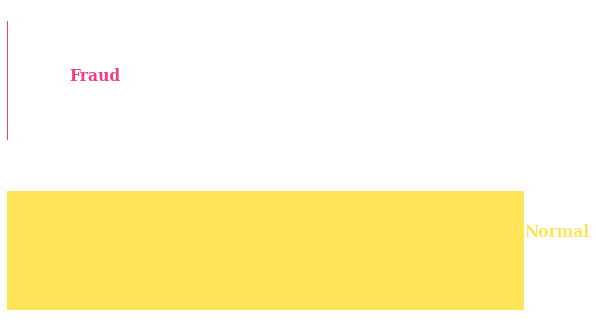

In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fig, ax = plt.subplots(figsize = (10,6), dpi=70 )
ax.barh([0], normal_share, height = 0.7, color = "#FFE459")
plt.text(100,0.08, 'Normal',{'fontname':'Serif','weight':'bold' ,'size':'16','color': "#FFE459"})
ax.barh([1], fraud_share, height = 0.7, color = '#F43B86')
plt.text(12,1, 'Fraud',{'fontname':'Serif', 'weight':'bold','size':'16','color':'#F43B86'})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

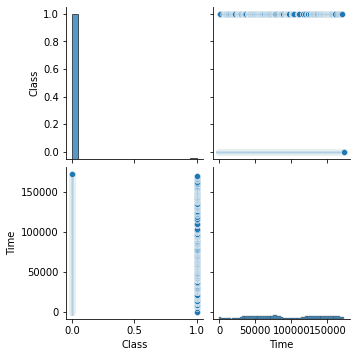

In [8]:
# Create a scatter plot to observe the distribution of classes with time
sns.pairplot(df, vars = ["Class", "Time"], dropna = True)

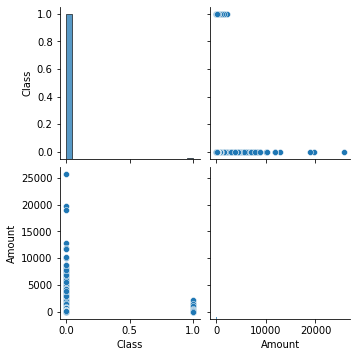

In [ ]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.pairplot(df, vars = ["Class", "Amount"], dropna = True)

In [9]:
# Drop unnecessary columns
#We can go ahead and drop the Time column from the data
df.drop('Time', axis = 1, inplace=True)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [11]:
y= df['Class']
X = df.drop('Class', axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , train_size = 0.8 , test_size = 0.2 , random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#Scale the train data
X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])

#Scale the test data by applying transform. 
X_test[['Amount']] = scaler.transform(X_test[['Amount']])


In [15]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


### Plotting the distribution of a variable

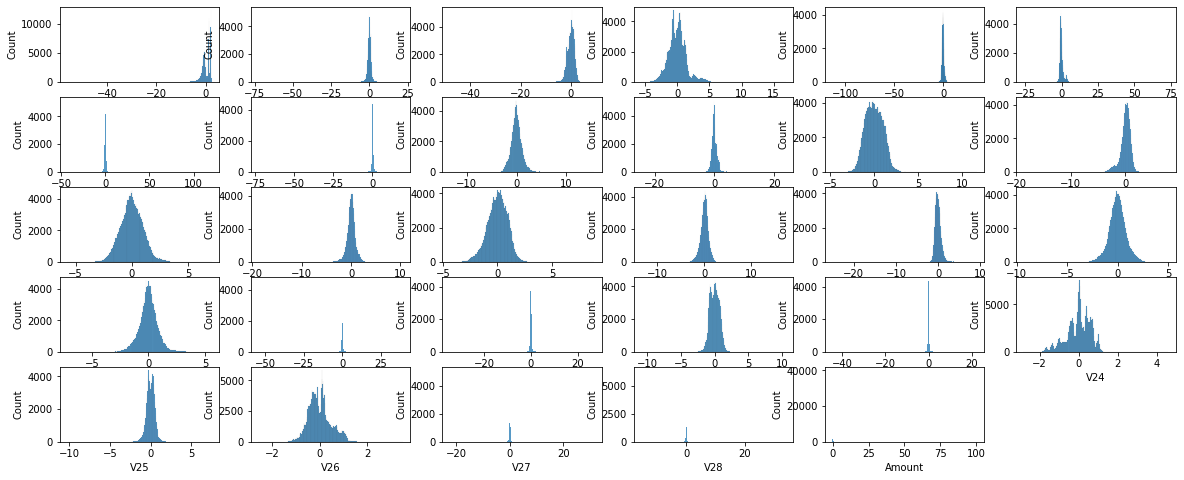

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize = (20,8))
cols = X_train.columns
i = 0 
for col in cols:
  i +=1
  plt.subplot(5,6,i)
  sns.histplot(X_train[col])
plt.show()

### Lots of the features are highly skewed. Let's check the skewness less than -1 and greater than 1.

In [16]:
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.277668,-4.890421,-2.274281,0.687466,-2.806948,1.944495,3.180573,-8.851621,0.542097,1.112318,0.364167,-2.303473,0.061568,-2.014879,-0.312641,-1.119031,-4.048546,-0.267691,0.111071,-1.810953,3.034115,-0.194068,-5.96524,-0.555467,-0.423168,0.579692,-0.77311,11.134475,18.155243


In [17]:
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


In [18]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
ptransform = PowerTransformer(copy = True)

#Fit the power transformation in train data
X_train[skewed] = ptransform.fit_transform(X_train[skewed])

#Transform the power transformer in test data
X_test[skewed] = ptransform.transform(X_test[skewed])


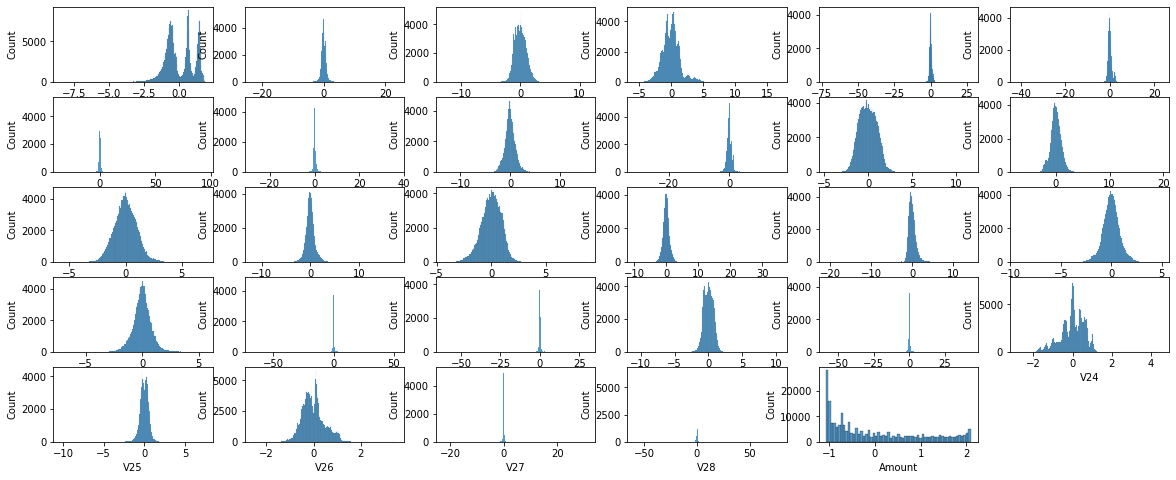

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
plt.figure(figsize = (20,8))
cols = X_train.columns
i = 0 
for col in cols:
  i +=1
  plt.subplot(5,6,i)
  sns.histplot(X_train[col])
plt.show()

## Model Building
The following model will be explored in the exercise. 
- Logistic Regression
- Decision Tree
- XGBoost
We will ignore some of the computationally expensive models such as RandomForest and KNN.  

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## Model Evaluation 1 - Linear regression 

In [ ]:
# Logistic Regression
from sklearn import linear_model 

num_C = {"C":[0.01, 0.1, 1, 10, 100, 1000]}
folds = StratifiedKFold(n_splits = 5)

In [ ]:
#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression() , 
                        param_grid = num_C , 
                        scoring = 'roc_auc' , 
                        cv = folds, return_train_score = True)

#perform hyperparameter tuning
model_cv.fit(X_train , y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Best ROC AUC score:  0.9840636550022415
Best hyperparameters:  {'C': 0.01}


In [ ]:
lr = LogisticRegression(C = 0.01)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

####Prediction and model selection on the train set. 

In [ ]:
y_train_pred = lr.predict(X_train)

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
def display_model_report(actual , pred):
  print(f"F1 score: {round(f1_score(actual , pred))}%")
  print(f"Classification report: \n {classification_report(actual , pred)}")

In [ ]:
display_model_report(y_train , y_train_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.89    227845
weighted avg       1.00      1.00      1.00    227845



In [24]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

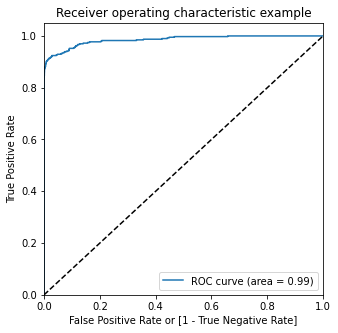

In [ ]:
# Predicted probability
y_train_pred_proba = lr.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_proba)

####Prediction and model selection on the test set.

In [ ]:
y_test_pred = lr.predict(X_test)
display_model_report(y_test , y_test_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.81      0.56      0.66        96

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
y_test_pred_proba = lr.predict_proba(X_test)[:,1]

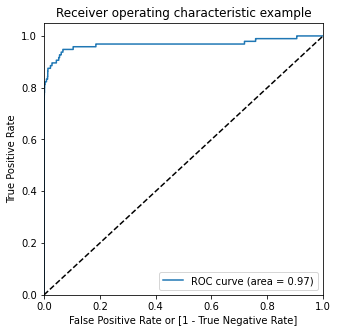

In [ ]:
draw_roc(y_test, y_test_pred_proba)

## Model Summary

### Train Set

*   Roc score : 99%
*   Recall score : 66%

### Test Set


*   Roc score : 97%
*   Recall score : 56%




## Model Evaluation 2 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

folds = 5 
param_grid = {
    'max_depth': range(1,20,5),
    'min_samples_leaf': range(50,300, 50),
    'min_samples_split':range(50, 300, 50)
}

In [ ]:
model_cv = GridSearchCV(estimator = DecisionTreeClassifier() , 
                        param_grid = param_grid , 
                        scoring = 'roc_auc' , 
                        cv = folds)

#perform hyperparameter tuning
model_cv.fit(X_train , y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_estimator_)

Best ROC AUC score:  0.9506416734066094
Best hyperparameters:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=250, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='gini',
                       max_depth=6, 
                       min_samples_leaf=250, min_samples_split=50,
                       random_state=100, splitter='best')
dt_classifier.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=250, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

####Prediction and model selection on the Train set.

In [ ]:
y_train_pred = dt_classifier.predict(X_train)
display_model_report(y_train , y_train_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



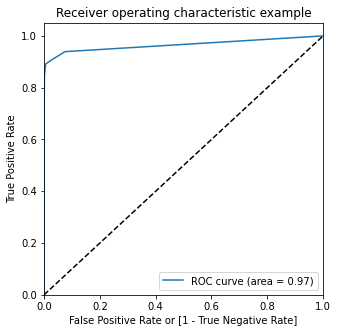

In [ ]:
y_train_pred_proba = dt_classifier.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_proba)

####Prediction and model selection on the test set.

In [ ]:
y_test_pred = dt_classifier.predict(X_test)
display_model_report(y_test , y_test_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



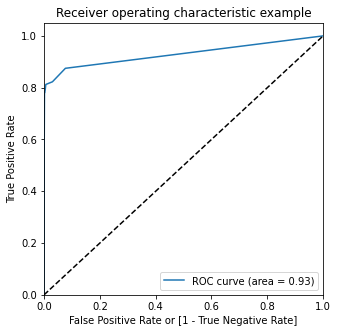

In [ ]:
y_test_pred_proba = dt_classifier.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

## Model Summary

### Train Set

*   Roc score : 97%
*   Recall score : 71%

### Test Set


*   Roc score : 93%
*   Recall score : 58%


## Model evaluation 3 - XGBoost

In [19]:

from xgboost import XGBClassifier

In [ ]:


# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.4,0.6,0.8], 
             'subsample': [0.3, 0.6, 0.9],
              'n_estimators':range(50,200, 50),
              'max_depth':range(1,20,5)}          


# specify model
xgb_model = XGBClassifier(nthread = 4)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = 4,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 14.5min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 112.4min
[Parallel(n_jobs=4)]: Done 432 out of 432 | elapsed: 229.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8],
                         'max_depth': range(1, 20, 5),
                         'n_estimators': range(50, 200, 50),
   

In [ ]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

xgb_classifier.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

####Prediction and model selection on the train set.

In [ ]:
y_train_pred = xgb_classifier.predict(X_train)
display_model_report(y_train , y_train_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845



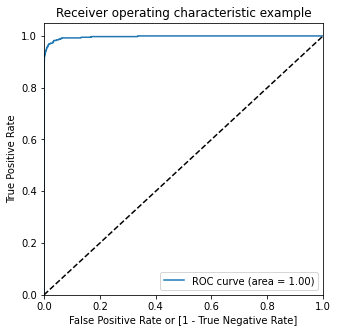

In [ ]:
y_train_pred_proba = xgb_classifier.predict_proba(X_train)[:,1]
draw_roc(y_train, y_train_pred_proba)

####Prediction and model selection on the test set.

In [ ]:
y_test_pred = xgb_classifier.predict(X_test)
display_model_report(y_test , y_test_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



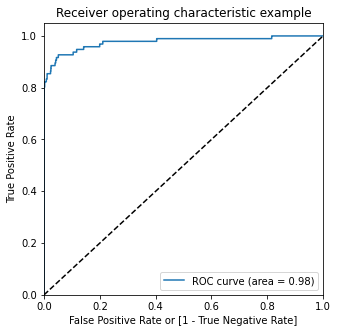

In [ ]:
y_test_pred_proba = xgb_classifier.predict_proba(X_test)[:,1]
draw_roc(y_test, y_test_pred_proba)

## Model Summary

### Train Set

*   Roc score : 100%
*   Recall score : 85%

### Test Set


*   Roc score : 98%
*   Recall : 76%

### Best Model 

Among the three models tested, the XGBoostClassifier Model seems to be efficient. As the recall score is above 75% and the ROC score is at 98%. So we will select the XGboost Model for the balanced data set. 

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


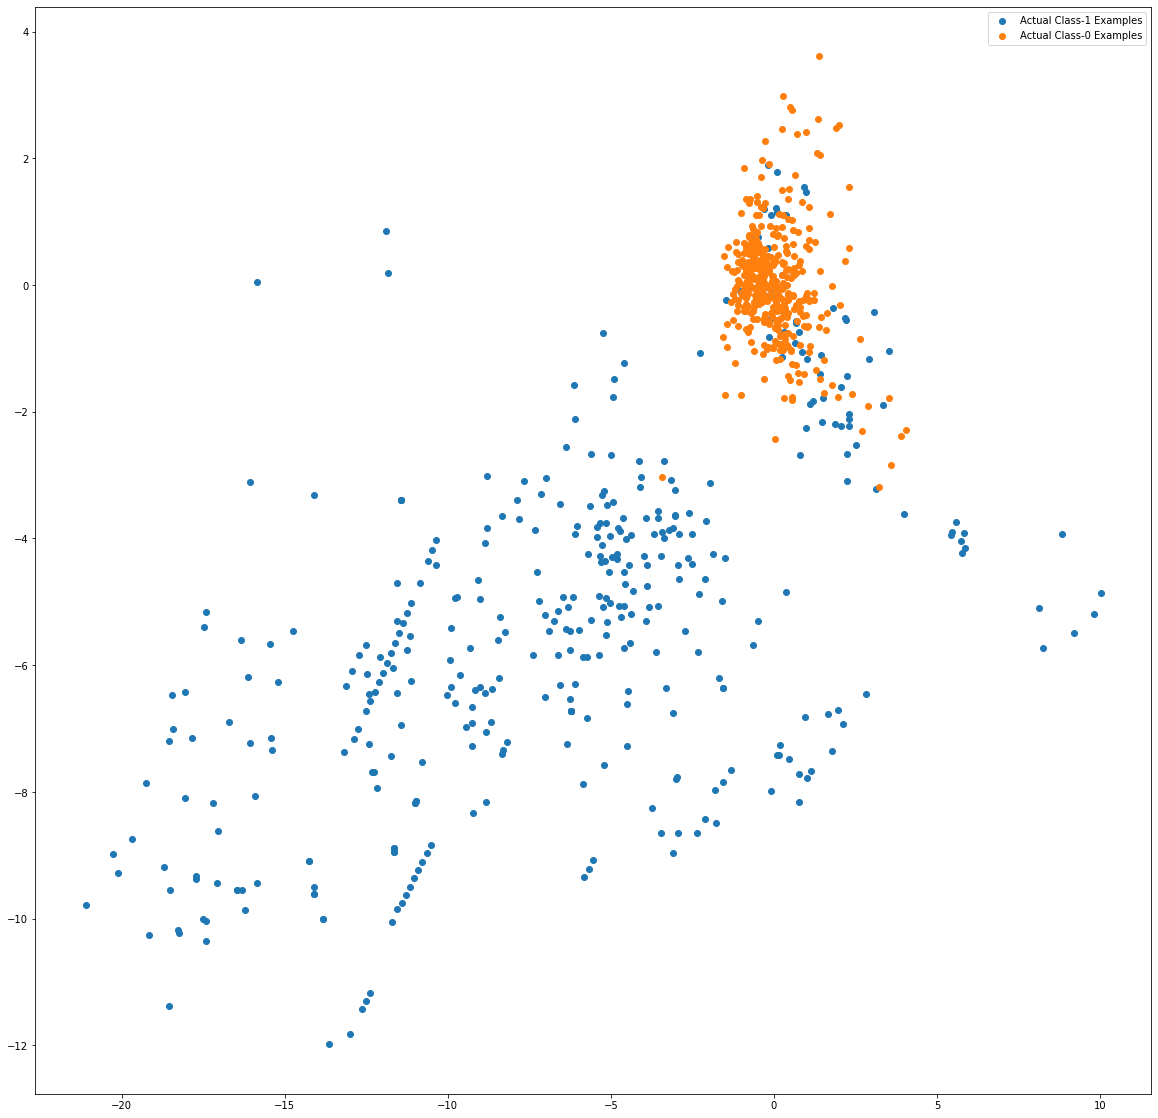

In [ ]:
var_imp = []
for i in xgb_classifier.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_classifier.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_classifier.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_classifier.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_classifier.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_classifier.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### We will perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

##### And use XGBoostClassifier which turned out to be the best model out of all the models we verified and check if the stats has improved.

## Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(sampling_strategy = 'minority')
X_sampled, y_sampled = sampler.fit_sample(X_train , y_train)

In [ ]:
from collections import Counter
#Before Sampling 
print('Before sampling class distribution', Counter(y_train))
# After Sampling
print('After sampling class distribution', Counter(y_sampled))

Before sampling class distribution Counter({0: 227449, 1: 396})
After sampling class distribution Counter({0: 227449, 1: 227449})


## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

xgb_classifier.fit(X_sampled , y_sampled)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

####Prediction and model selection on the train sampled set.

In [ ]:
y_train_pred = xgb_classifier.predict(X_sampled)
display_model_report(y_sampled, y_train_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



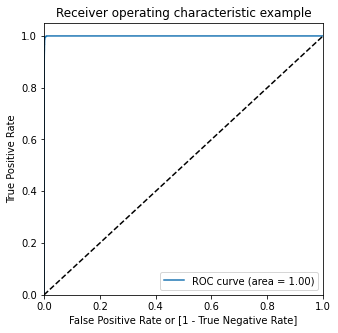

In [ ]:
y_train_pred_proba = xgb_classifier.predict_proba(X_sampled)[:,1]
draw_roc(y_sampled, y_train_pred_proba)

### Model evaluation on the test set

In [ ]:
y_test_pred = xgb_classifier.predict(X_test.values)
display_model_report(y_test , y_test_pred)

F1 score: 0%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.23      0.82      0.36        96

    accuracy                           1.00     56962
   macro avg       0.62      0.91      0.68     56962
weighted avg       1.00      1.00      1.00     56962



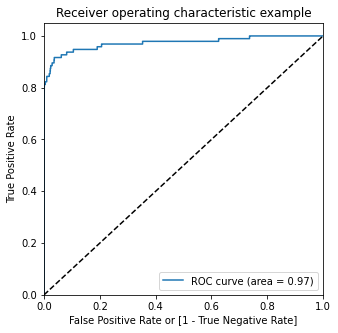

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_classifier.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model Summary

### Train Set

*   Roc score : 100%
*   Recall score : 100%

### Test Set


*   Roc score : 97%
*   Recall : 82%

### Class distribution after applying SMOTE 

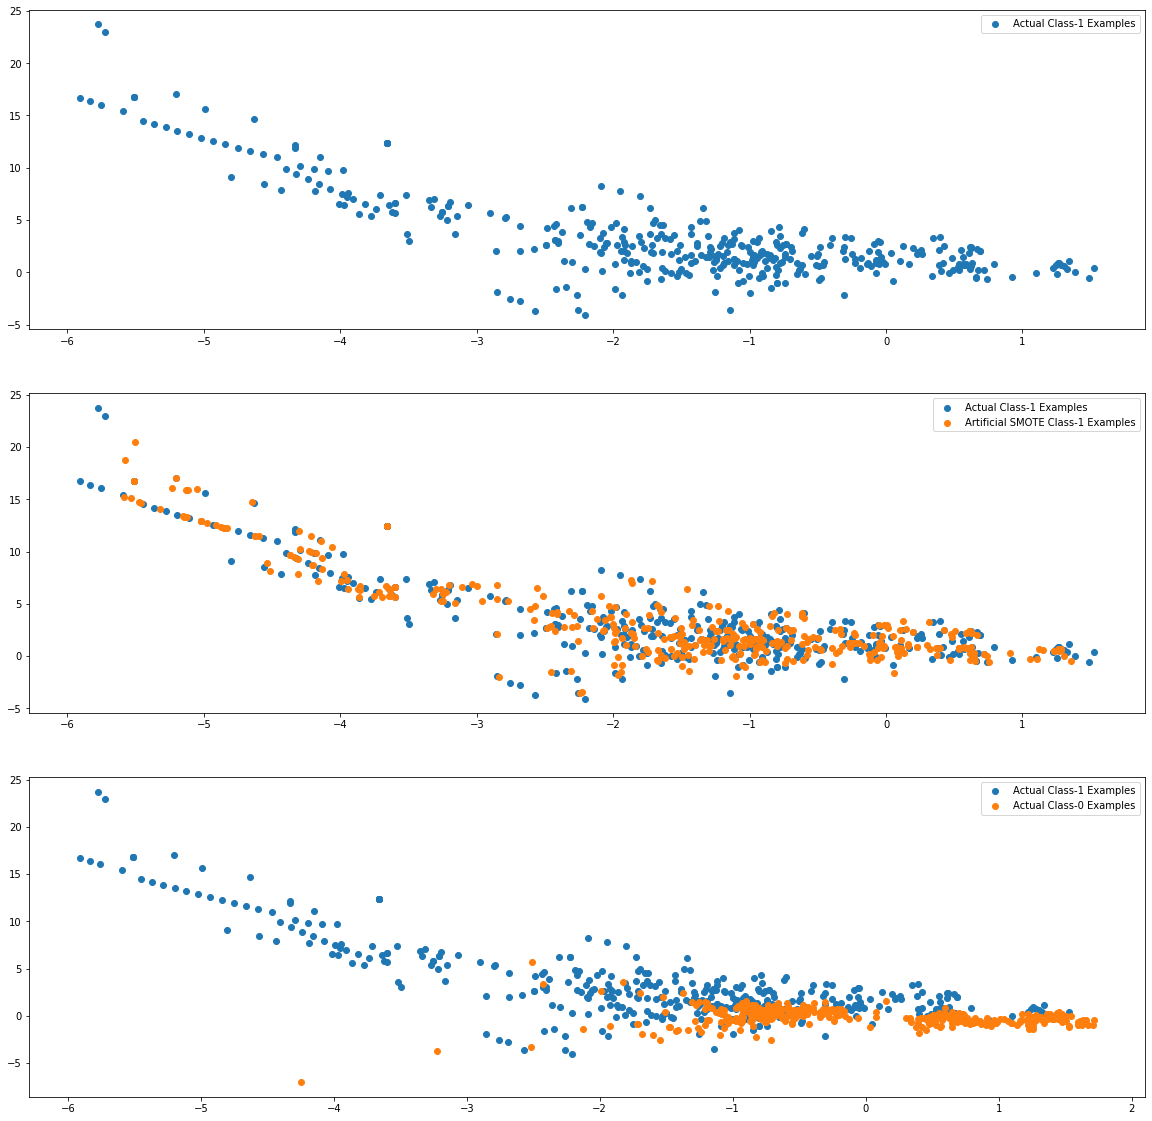

In [21]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### XGB Classifier against SMOTE

In [22]:
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

xgb_classifier.fit(X_train_smote , y_train_smote)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

####Prediction and model selection on the train smote set.

In [26]:
y_train_pred = xgb_classifier.predict(X_train_smote)
display_model_report(y_train_smote, y_train_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227449
           1       0.99      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



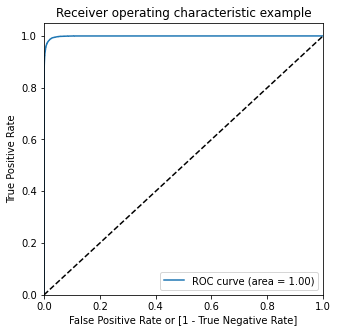

In [27]:
# Predicted probability
y_train_pred_proba = xgb_classifier.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [28]:
y_test_pred = xgb_classifier.predict(X_test.values)
display_model_report(y_test, y_test_pred)

F1 score: 0%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.83      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



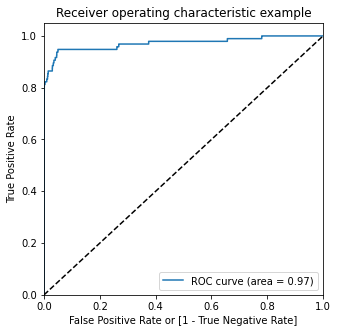

In [30]:
# Predicted probability
y_test_pred_proba = xgb_classifier.predict_proba(X_test.values)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model Summary

### Train Set

*   Roc score : 100%
*   Recall score : 97%

### Test Set


*   Roc score : 97%
*   Recall : 83%

##### Build models on other algorithms to see the better performing on SMOTE

### Class distribution after applying ADASYN

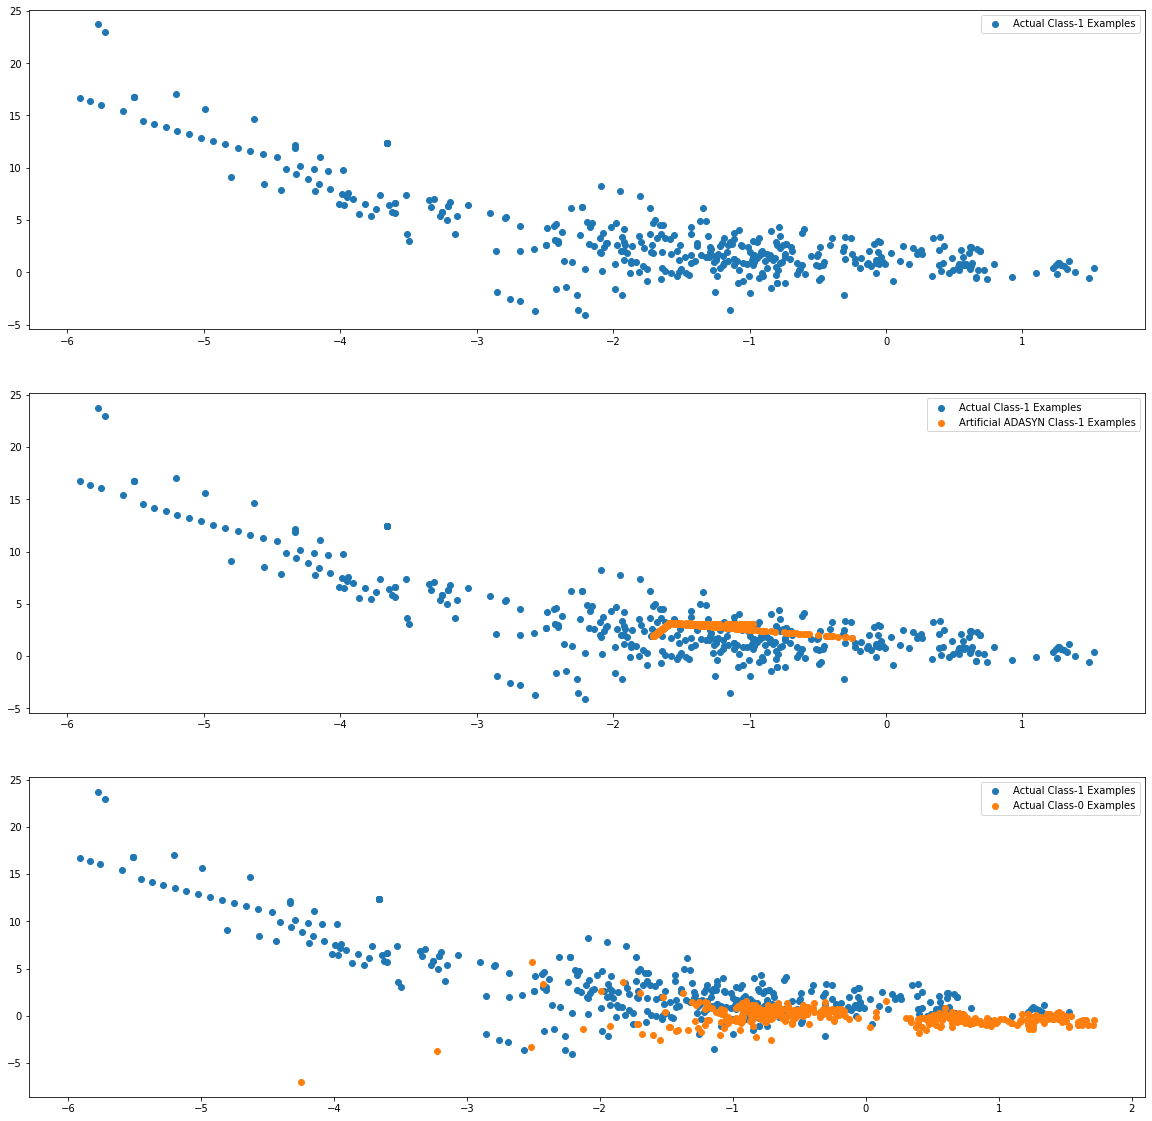

In [33]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [34]:
xgb_classifier_adasyn = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

xgb_classifier_adasyn.fit(X_train_adasyn , y_train_adasyn)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
y_train_pred = xgb_classifier_adasyn.predict(X_train_adasyn)
display_model_report(y_train_adasyn, y_train_pred)

F1 score: 1%
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    227449
           1       0.96      0.98      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



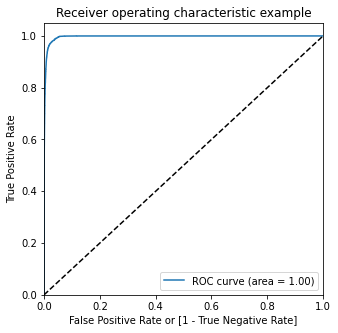

In [41]:
# Predicted probability
y_train_pred_proba = xgb_classifier_adasyn.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [42]:
y_test_pred = xgb_classifier_adasyn.predict(X_test.values)
display_model_report(y_test, y_test_pred)

F1 score: 0%
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.89      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



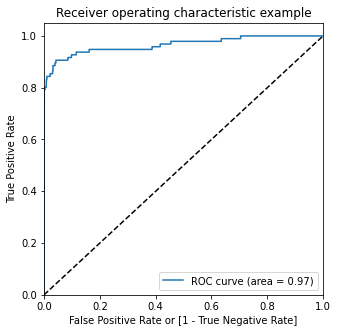

In [43]:
# Predicted probability
y_test_pred_proba = xgb_classifier_adasyn.predict_proba(X_test.values)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

## Model Summary

### Train Set

*   Roc score : 100%
*   Recall score : 98%

### Test Set


*   Roc score : 97%
*   Recall : 89%

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


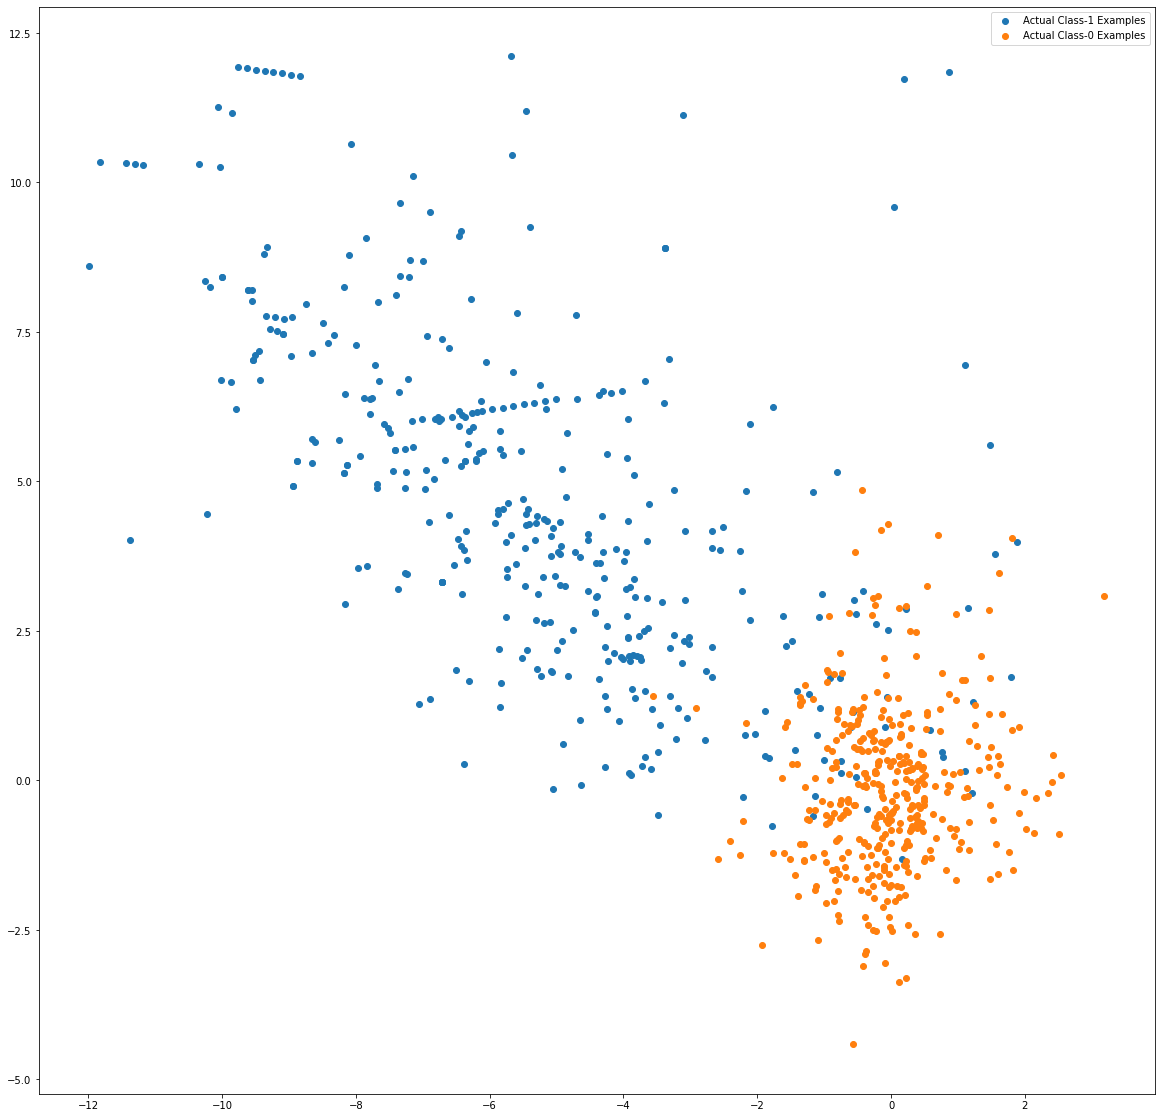

In [35]:
var_imp = []
for i in xgb_classifier_adasyn.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_classifier_adasyn.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_classifier_adasyn.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_classifier_adasyn.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_classifier_adasyn.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_classifier_adasyn.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [44]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_adasyn, y_train_pred_proba ,drop_intermediate = False )
auc_score = metrics.roc_auc_score( y_train_adasyn, y_train_pred_proba )
print('Train auc =',auc_score)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9968876234559237
0.5446437


#### The ROC score and Recall has improved quite well with XGBoostClassifier Model over the ADASYN balanced data set with a recall of 89% close to 90%. And hence we can conclude the balanced data set with ADASYN performs better with the XGBoostClassifier. The threshold is around 55%